<h1> GEOSPATIAL ANALYSIS OF GREENHOUSE GAS EMISSION AND POPULATION ACROSS DIFFERENT CONTINENTS</h1> 

**OBJECTIVES**

- To analyse the geospatial data and answer specific questions based on the data.
- To plot maps according to the specified conditions applicable on the given geospatial data
- To appreciate the role of maps particularly choropleth maps in revealing the themes associated with the geospatial data.


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Application of Python-based geospatial visualisation tool**
</div>

In [1]:
#importing needed libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Greenhouse gas emmision file and viewing the first few rows
df = pd.read_csv('API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1865570.csv', skiprows=4)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.164846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> **PRE-PROCESSING AND EXPLORATORY DATA ANALYSIS OF DATASET**
 </div>

In [3]:
df.shape

(264, 66)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            239 non-null    float64
 15  1971            238 non-null    float64
 16  1972            238 non-null    float64
 17  1973            237 non-null    flo

**There are 264 rows and 66 columns in the dataset.**

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Checking for null values**
</div>

In [5]:
df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2017              264
2018              264
2019              264
2020              264
Unnamed: 65       264
Length: 66, dtype: int64

In [6]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Using heatmap to check for null values within the dataset**
     </div>

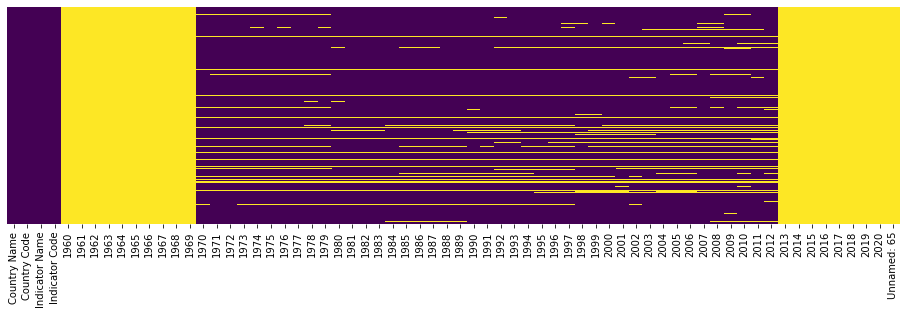

In [7]:
plt.figure(figsize =(16, 4))
df_map = sns.heatmap(df.isna(),yticklabels=False ,cbar= False, cmap= 'viridis')
df_map

The yellow colored parts are the null cells within the columns. I will drop the entirely empty or redundant columns within  the data.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Droping redundant columns**
     </div>

**The focus for analysis is years 2000 to 2010**

In [8]:
column = df[['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65']]
df = df.drop(column, axis= 1)
df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,13530.953,12585.402,13842.7381,14709.884,14654.374,14770.2643,14849.1594,15272.633,15288.7756,15554.4295,17791.329902


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Summarizing the descriptive statistics of numerical variables**
     </div>

In [9]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,2.300000e+02,2.300000e+02,2.290000e+02,2.300000e+02,2.300000e+02,2.280000e+02,2.270000e+02,2.290000e+02,2.250000e+02,2.240000e+02,2.210000e+02
mean,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06
std,4.565088e+06,4.552742e+06,4.928232e+06,5.090879e+06,5.241620e+06,5.505084e+06,5.753450e+06,5.879057e+06,5.720444e+06,5.718695e+06,6.136163e+06
min,4.896875e+00,4.907344e+00,5.034354e+00,5.041195e+00,5.039763e+00,5.042693e+00,5.045092e+00,5.052994e+00,5.062560e+00,5.068208e+00,5.109678e+00
25%,1.151943e+04,1.212971e+04,1.265601e+04,1.282721e+04,1.319181e+04,1.341309e+04,1.437292e+04,1.441614e+04,1.508259e+04,1.553820e+04,1.579435e+04
50%,6.835841e+04,6.782502e+04,7.083349e+04,7.467153e+04,7.082929e+04,7.505318e+04,7.417113e+04,7.713576e+04,7.523855e+04,7.454908e+04,7.907244e+04
75%,5.251454e+05,5.069766e+05,5.348393e+05,5.428833e+05,5.585663e+05,5.620581e+05,5.805686e+05,6.343747e+05,5.949822e+05,5.656398e+05,6.095866e+05
max,4.056344e+07,4.036567e+07,4.307057e+07,4.442230e+07,4.565890e+07,4.721606e+07,4.863999e+07,4.997739e+07,4.866444e+07,4.815062e+07,5.091111e+07


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Summarizing the non-numerical variables**
     </div>

In [10]:
df.describe(include=['O'])

,Country Name,Country Code,Indicator Name,Indicator Code
count,264,264,264,264
unique,264,264,1,1
top,European Union,MDV,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE
freq,1,1,264,264


The non-numerical summary shows we are working on the 'Total greenhouse gas emmision in KT of CO2' with 264 unique variables in each row.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Inspecting the columns of data**
     </div>

In [11]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   2000            230 non-null    float64
 5   2001            230 non-null    float64
 6   2002            229 non-null    float64
 7   2003            230 non-null    float64
 8   2004            230 non-null    float64
 9   2005            228 non-null    float64
 10  2006            227 non-null    float64
 11  2007            229 non-null    float64
 12  2008            225 non-null    float64
 13  2009            224 non-null    float64
 14  2010            221 non-null    float64
dtypes: float64(11), object(4)
memory usage: 31.1+ KB


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**FILTERING, EXPLORATORY ANALYSIS AND PRE-PROCESSING OF IMPORTANT ROWS**
     </div>

**Specific focus for now is years 2000 and 2010**

In [13]:
#filter for important rows
countries = df[['Country Name', 'Country Code', '2000', '2010']]
countries.head()

,Country Name,Country Code,2000,2010
0,Aruba,ABW,NaN,NaN
1,Afghanistan,AFG,13530.9530,17791.329902
2,Angola,AGO,34780.6811,40029.392101
3,Albania,ALB,8389.2767,8506.996034
4,Andorra,AND,NaN,NaN


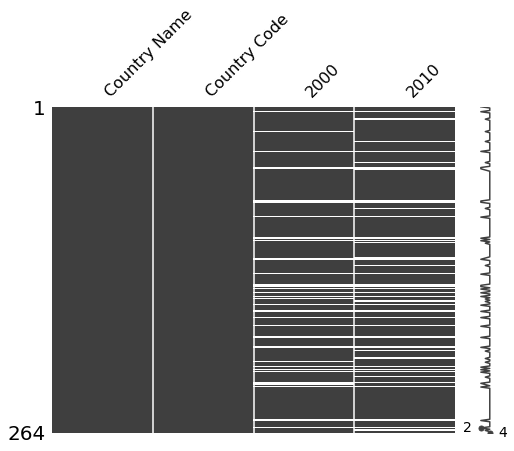

In [14]:
#checking for missing values in the interested columns
import missingno as msno
msno.matrix(countries, figsize=(8, 6))

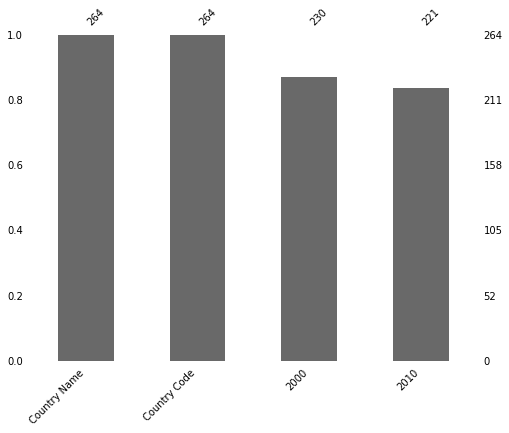

In [15]:
#confirming the actual number of missing values in the interested column
msno.bar(countries,  figsize=(8, 6), fontsize=10, color='dimgray' )

**I intend to fill the missing values and by checking the skewness and presence of outliers in the data, it can help to decide whether to fill the data with mean/median/mode.**

**Mean will be the best filling technique for a normally distributed data while median will be considered if the extreme values or outliers are much.**

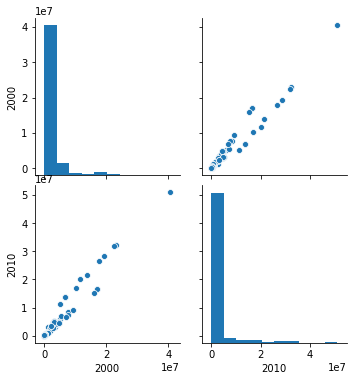

In [16]:
columns = ['2000', '2010']
sns.pairplot(countries[columns])

**From the graphs above, we can see that the values are not normally distributed. There are lots of skewness within the dataset. Hence, median will be the best to fill the null values within the dataset.**

In [17]:
#filling the null values with median due to the skewness of the variables.
countries['2000'].fillna(countries['2000'].median(), inplace=True)
countries['2010'].fillna(countries['2010'].median(), inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   2000          264 non-null    float64
 3   2010          264 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.4+ KB


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Import the Natural Lowres Path to merge with the 'countries' dataframe**
     </div>

In [19]:
#read the natural lowres path
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [20]:
#renaming column
world = world.rename(columns={'iso_a3':'Country Code'})
world.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [21]:
#merge natural lowres with countries dataset
countries_merge = world.merge(countries, on='Country Code').drop_duplicates(subset=['Country Code'])
countries_merge.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry,Country Name,2000,2010
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1.574685e+03,2.163922e+03
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2.159394e+05,2.341472e+05
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.606430e+05,7.641377e+05
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,6.969124e+06,6.713349e+06
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2.073954e+05,3.473561e+05


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Checking the CRS of the geodataframe 'countries_merge'**
     </div>

In [22]:
countries_merge.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Changing the CRS to Metres from Degrees**
     </div>

In [23]:
countries_merge = countries_merge.to_crs(epsg=3857)
countries_merge.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry,Country Name,2000,2010
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1812498.413, 200...",Fiji,1.574685e+03,2.163922e+03
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105758.362, 3792946.708...",Tanzania,2.159394e+05,2.341472e+05
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",Canada,7.606430e+05,7.641377e+05
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",United States,6.969124e+06,6.713349e+06
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((9724867.413 6311418.173, 9640131.701...",Kazakhstan,2.073954e+05,3.473561e+05


In [24]:
countries_merge.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Selecting the columns neccesary for our analysis**
     </div>

In [25]:
gdf_countries =countries_merge[['Country Code','geometry', '2000', '2010']]
gdf_countries.head()

,Country Code,geometry,2000,2010
0,FJI,"MULTIPOLYGON (((20037508.343 -1812498.413, 200...",1.574685e+03,2.163922e+03
1,TZA,"POLYGON ((3774143.866 -105758.362, 3792946.708...",2.159394e+05,2.341472e+05
2,CAN,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",7.606430e+05,7.641377e+05
3,USA,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",6.969124e+06,6.713349e+06
4,KAZ,"POLYGON ((9724867.413 6311418.173, 9640131.701...",2.073954e+05,3.473561e+05


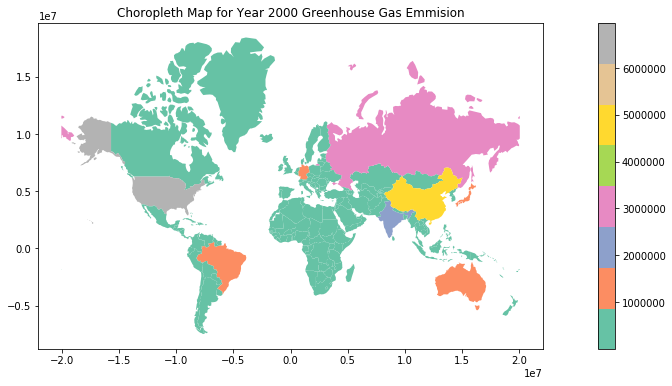

In [26]:
base= world.plot(color='grey', edgecolor= 'black', figsize= (20,6))
gdf_countries.plot(column='2000', ax=base, cmap ='Set2', figsize = (20, 6), legend = True)
plt.title('Choropleth Map for Year 2000 Greenhouse Gas Emmision')
plt.show()

**INTERPRETATION**

The distribution of greenhouse gas emissions worldwide in **2000** is depicted on this choropleth map.
Each of the regions on the map is coloured differently to indicate the level of emissions. The range of emissions associated with each colour is shown in the map's legend.

According to the map, USA, China, Russia, and India have the highest concentrations of emissions, which are depicted by the colours ash, yellow, pink, and grey respectively. 

In contrast, the regions with the lowest emissions levels are mainly in Africa, Europe, South America, and North America. The orange and green colour used to denote these areas' low emission levels.




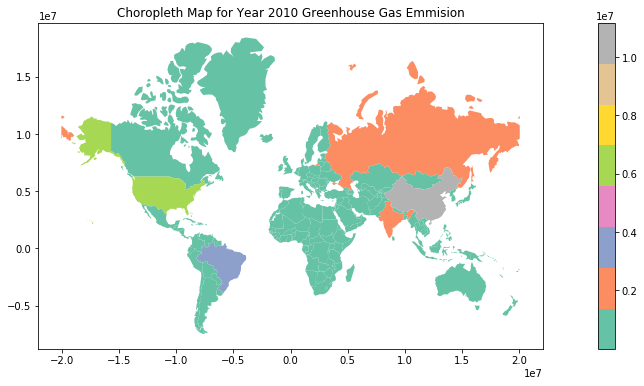

In [27]:
base= world.plot(color='grey', edgecolor= 'black', figsize= (20,6))
gdf_countries.plot(column='2010', ax=base, cmap ='Set2', figsize = (20, 6), legend = True )
plt.title('Choropleth Map for Year 2010 Greenhouse Gas Emmision')
plt.show()

**INTERPRETATION**

The distribution of greenhouse gas emissions worldwide in **2010** is depicted on this choropleth map.
The visualisation shows China, USA, and Brazil have the highest emissions concentrations; these three countries are represented by colours ash, light green, and grey on the map, respectively. 

The regions with the lowest emissions levels, are found in South America, North America, Africa, Russia, and Europe. Low emission levels in these places were highlighted by the orange and green colour.

**The Choropleth visualisations demonstrates geographic and global variations in greenhouse gas emissions.** 





<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Importing population dataset**
     </div>

In [28]:
population_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv', skiprows = 4)
population_df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN


In [29]:
population_df.shape

(266, 67)

In [30]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [31]:
#filtering column of interest
countries_population = population_df[['Country Code', '2005']]
countries_population.head()

,Country Code,2005
0,ABW,100028.0
1,AFE,453404076.0
2,AFG,25654274.0
3,AFW,305520588.0
4,AGO,19433604.0


**Columns of interest to the activity do not have null values**

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Filtering columns of interest from green house emission dataset**
     </div>

In [32]:
countries_greenhouse = df[['Country Name', 'Country Code', '2005']]
countries_greenhouse.head()

,Country Name,Country Code,2005
0,Aruba,ABW,NaN
1,Afghanistan,AFG,14770.2643
2,Angola,AGO,35855.7384
3,Albania,ALB,8308.3856
4,Andorra,AND,NaN


In [33]:
countries_greenhouse.shape

(264, 3)

In [34]:
countries_greenhouse.isna().sum()

Country Name     0
Country Code     0
2005            36
dtype: int64

 <div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> **Pre-Processing**
     </div>

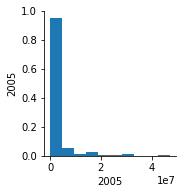

In [35]:
columns = ['2005']
sns.pairplot(countries_greenhouse[columns])

In [36]:
#filling the null values with median due to the skewness of the variables.
countries_greenhouse['2005'].fillna(countries_greenhouse['2005'].median(), inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [37]:
countries_greenhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   2005          264 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


In [38]:
#merging the population and greenhouse gas emission tables
countries_merge = countries_greenhouse.merge(countries_population, on = 'Country Code',).drop_duplicates(subset=['Country Code'])

#renaming the columns deignated as x and y after merging
countries_merge = countries_merge.rename(columns={'2005_x':'2005_Greenhouse', '2005_y':'2005_Population'} )
countries_merge.head()

,Country Name,Country Code,2005_Greenhouse,2005_Population
0,Aruba,ABW,75053.181245,100028.0
1,Afghanistan,AFG,14770.264300,25654274.0
2,Angola,AGO,35855.738400,19433604.0
3,Albania,ALB,8308.385600,3011487.0
4,Andorra,AND,75053.181245,78871.0


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Import the Natural Lowres Path**
     </div>

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [40]:
world = world.rename(columns={'iso_a3':'Country Code'})
world.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
new_country_merge = world.merge(countries_merge, on='Country Code').drop_duplicates(subset=['Country Code'])
new_country_merge.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry,Country Name,2005_Greenhouse,2005_Population
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1.836070e+03,821606.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2.695590e+05,38450323.0
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,8.497987e+05,32243753.0
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,7.182808e+06,295516599.0
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2.916410e+05,15147029.0


In [42]:
new_country =new_country_merge[['Country Code','geometry', '2005_Greenhouse', '2005_Population']]
new_country.head()

,Country Code,geometry,2005_Greenhouse,2005_Population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.836070e+03,821606.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.695590e+05,38450323.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",8.497987e+05,32243753.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",7.182808e+06,295516599.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2.916410e+05,15147029.0


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Choropleth maps of greenhouse gas emission for year 2005, with the countries having populations less than 109856670.**
     </div>

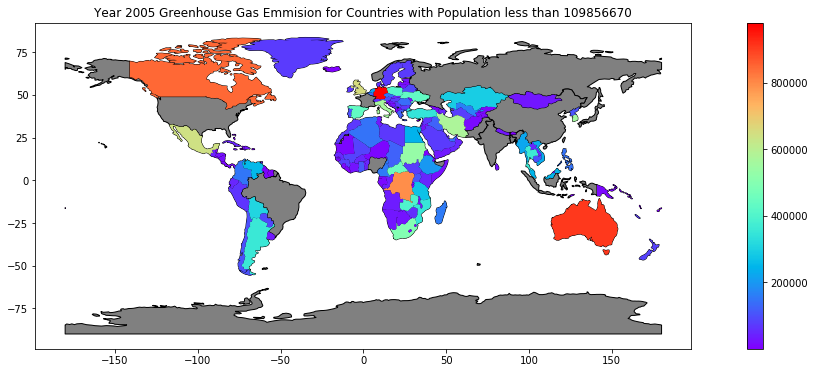

In [43]:
pop_country=new_country[new_country['2005_Population'] < 109856670]
base= world.plot(color='grey', edgecolor= 'black', figsize= (20,6))
pop_country.plot(column='2005_Greenhouse',ax=base, cmap='rainbow', legend = True, figsize= (20,6) )
plt.title('Year 2005 Greenhouse Gas Emmision for Countries with Population less than 109856670')
plt.show()

**INTERPRETATION**

This choropleth map displays the distribution of greenhouse gas emissions of the year 2005, for nations with a population below 109,856,670. The range of emissions associated with each colour is shown in the map's legend.

To show the level of emissions, the countries are coloured uniquely. 
The highest emission concentrations are indicated on the map as Australia, Germany, Canada, and the Democratic Republic of the Congo, with fading hues from red to orange showing each geographical country. 

**In contrast, the regions with the lowest emissions levels are mainly in Africa, Europe, South America, and North America. The orange and green colour used to denote these areas' low emission levels.**


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Choropleth maps of greenhouse gas emission for year 2005, with the countries having populations greater than 236200507.**
     </div>

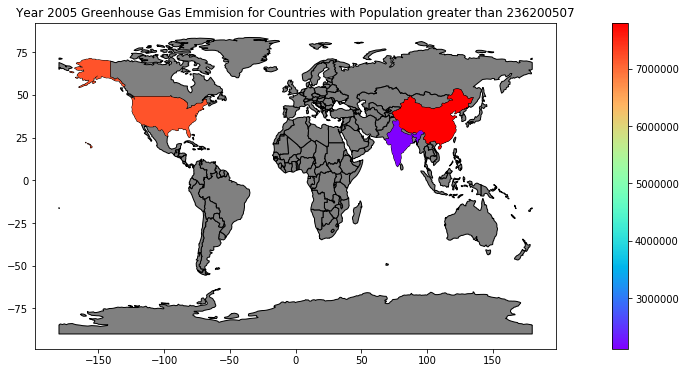

In [44]:
pop_country1=new_country[new_country['2005_Population'] > 236200507]
base= world.plot(color='grey', edgecolor= 'black', figsize= (20,6))
pop_country1.plot(column='2005_Greenhouse', ax= base, cmap='rainbow', legend = True, figsize= (20,6))
plt.title('Year 2005 Greenhouse Gas Emmision for Countries with Population greater than 236200507')
plt.show()

**INTERPRETATION**

This choropleth map displays the distribution of greenhouse gas emissions of the year 2005, for nations with a population greater than 236,200,507. The range of emissions associated with each colour is shown in the map's legend.

The countries are each coloured distinctively to represent the level of emissions. The visualisation displays China, USA, and India with the highest emission concentrations, and the colours of each country diminishing from red to purple.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Choropleth maps of greenhouse gas emission for year 2005, with the countries having population between 842881 and 80890450.**
     </div>

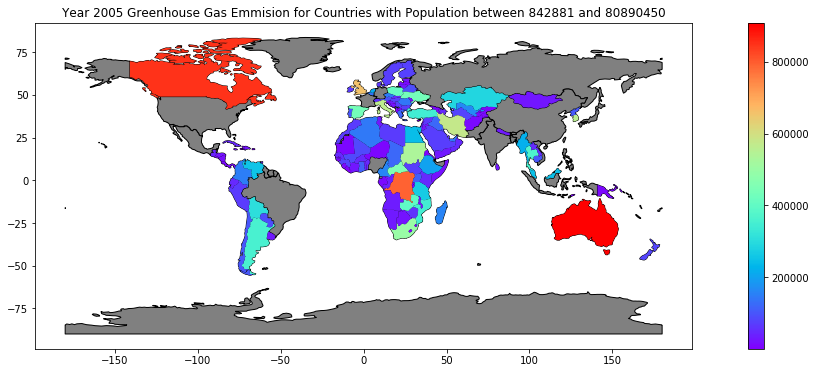

In [45]:
pop_country2 = new_country[(new_country['2005_Population'] >= 842881) & (new_country['2005_Population'] <= 80890450 )]
base= world.plot(color='grey', edgecolor= 'black', figsize= (20,6))
pop_country2.plot(column='2005_Greenhouse',ax=base, cmap='rainbow', legend = True, figsize= (20,6) )
plt.title('Year 2005 Greenhouse Gas Emmision for Countries with Population between 842881 and 80890450')
plt.show()

**INTERPRETATION**

This choropleth map displays the distribution of greenhouse gas emissions of the year 2005, for nations with a population between 842881 and 80,890,450.The legend of the map displays the range of emissions corresponding to each colour.

To show the level of emissions, the countries are coloured uniquely. The highest emission concentrations are indicated on the map as Australia, Canada and Democratic Republic of Congo with fading hues of red.

The lowest emmisions are predominantly in Africa, Saudi Arabia, Mongolia, Sweden and Finland.

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Plot of the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010.**</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Import the Natural Lowres Path**
     </div>

In [46]:
### feature selection / filter for relevant columns
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns={'iso_a3': 'Country Code'}, inplace=True)
world= world[['Country Code']]
world.head()

,Country Code
0,FJI
1,TZA
2,ESH
3,CAN
4,USA


In [47]:
population_df1 = world.merge(population_df,how='left')
population_df1.head(3)

,Country Code,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,FJI,Fiji,"Population, total",SP.POP.TOTL,393480.0,407244.0,421673.0,436303.0,450538.0,463960.0,...,865602.0,866447.0,868632.0,872406.0,877460.0,883490.0,889955.0,896444.0,902899.0,NaN
1,TZA,Tanzania,"Population, total",SP.POP.TOTL,10052151.0,10346695.0,10651954.0,10968196.0,11295675.0,11634837.0,...,48483132.0,49960563.0,51482638.0,53049231.0,54660345.0,56313444.0,58005461.0,59734213.0,61498438.0,NaN
2,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#find the country with highest population in 2010.
population_df1.iloc[population_df1['2010'].idxmax()]['Country Name']

'China'

In [49]:
df_china_greenhouse= df.loc[df['Country Code']=='CHN']
df_china_greenhouse

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
38,China,CHN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,5082325.6,5145521.55,5474914.9,6226962.5,7116642.4,7803535.6,8573395.4,9124046.5,10022024.8,10617264.9,11183810.6


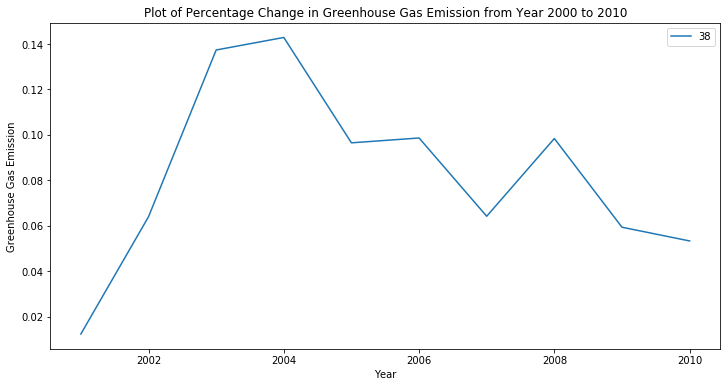

In [50]:
#plotting the % change in greenhouse gas emission from 2000 to 2010
plt.rcParams['figure.figsize'] = (12,6)
df_china_greenhouse.iloc[:,4:15].pct_change(axis=1).T.plot(kind='line')
plt.title('Plot of Percentage Change in Greenhouse Gas Emission from Year 2000 to 2010')
plt.xlabel('Year')
plt.ylabel('Greenhouse Gas Emission')
plt.show()

**INTERPRETATION**

This line plot displays the percentage change in greenhouse gas emission in China from Year 2000 to 2010 which is important for understanding the overall impact of greenhouse gas emissions on the country. The years included in the analysis are displayed on the x-axis, while the % change in emissions is displayed on the y-axis.

The plot shows an increase in emission from 2000 to 2004, which was also the time of its peak. A consistent decrease in emissions from 2004 to 2010 was observed and may indicate the adoption of technology or policies that have reduced emissions.



<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Scatter plot and correlation between the mean population of each country and mean greenhouse gas emission considering from year 2000 until 2010.**
     </div>

**Inspecting the Columns**

In [51]:
population_df1.columns

Index(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [52]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010'],
      dtype='object')

In [53]:
columns_ = ['Country Code', 'Country Name', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010']
pop_df1 = population_df1[columns_]
df_gh = df[columns_]

In [54]:
pop_df1.head(2)

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,FJI,Fiji,811011.0,813923.0,815257.0,816078.0,817864.0,821606.0,827869.0,836185.0,845356.0,853636.0,859816.0
1,TZA,Tanzania,33499177.0,34385849.0,35334790.0,36337778.0,37379766.0,38450323.0,39548666.0,40681416.0,41853944.0,43073830.0,44346532.0


In [55]:
df_gh.head(2)

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,13530.953,12585.402,13842.7381,14709.884,14654.374,14770.2643,14849.1594,15272.633,15288.7756,15554.4295,17791.329902


In [56]:
#merging the natural earht lowres dataset and the emission dataset
df_greenhouse_emision= pd.DataFrame(world).merge(df_gh,how='left')
df_greenhouse_emision.head()

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,FJI,Fiji,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03
1,TZA,Tanzania,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05
2,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,Canada,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05
4,USA,United States,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.182808e+06,6.994087e+06,7.128952e+06,6.648991e+06,6.604069e+06,6.713349e+06


In [57]:
#filling the null values with median.
df_greenhouse_emision[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']].fillna(df_greenhouse_emision[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']].median(), inplace=True)


C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [58]:
#assigning the mean of the gas emission and population datasets to a variable
pop_df1['mean']= pop_df1.mean(axis=1)

df_greenhouse_emision['mean']= df_greenhouse_emision.mean(axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


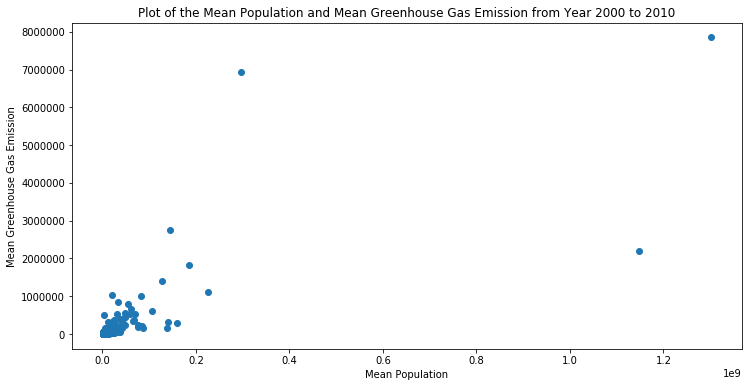

In [59]:
#plotting for the mean population and greenhouse gas emission from 2000 to 2010
plt.scatter(pop_df1['mean'], df_greenhouse_emision['mean'])
plt.title('Plot of the Mean Population and Mean Greenhouse Gas Emission from Year 2000 to 2010')
plt.xlabel('Mean Population')
plt.ylabel('Mean Greenhouse Gas Emission')
plt.show()

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Getting Correlation**
     </div>

In [60]:
pop_mean = pop_df1['mean']
emission_mean = df_greenhouse_emision['mean']

#concatenating the gas emission and population mean
meanpopemision = pd.concat([pop_mean, emission_mean], axis = 1) 

#correlation
meanpopemision.corr()
meanpopemision = meanpopemision.corr().iloc[1,0]
#print('Correlation coefficient:', meanpopemision.corr().iloc[1,0])

#approximate to 2 decimal places
meanpopemision = round(meanpopemision, 2)
print('Correlation coefficient:', meanpopemision)


Correlation coefficient: 0.76


**INTERPRETATION**

The visualization above displays the mean green house gas emmision and mean population of the various countries within the dataset. Few countries have extremely hign mean emmision and population and these are the outliers within the scatter plot.
Further analysis shows a strong positive correlation with Coefficient of **0.76**. This means that as the population increases, the green gas emission tends to increase as well and vice versa.

**Since majority of the scatter points have green house gas emmision of 3,000,000 and below, I will remove the outliers above this value. Removing outliers can significantly affect the estimates of the correlation coefficient**

**The outliers must be got rid of to widen the clustered points for better display, which will make the scatter plot clearer to read and understand while we also check its correlation.**

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Removing Outliers**
     </div>

**I plan to load the Numpy library, compute the z-score for each data point, and then give each one a threshold value that will be used to filter out data points with a higher threshold.**

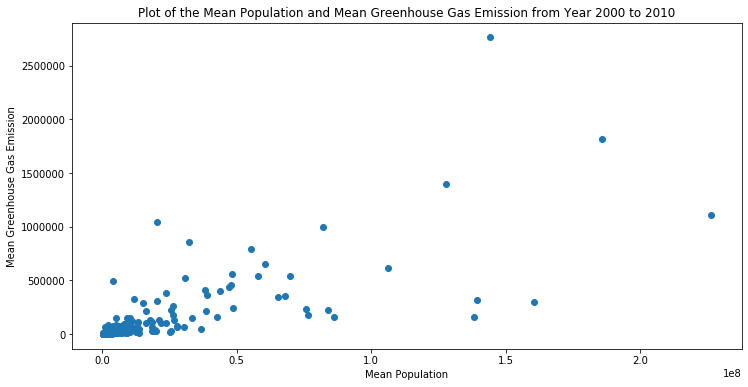

In [61]:
import numpy as np

#Calculate z-score for each data point
z_scores = np.abs((pop_mean - pop_mean.mean()) / pop_mean.std())
threshold = 1.8

#Filter out the data points that have z-score greater than the threshold
pop_filtered = pop_mean[z_scores < threshold]
emission_filtered = emission_mean[z_scores < threshold]

#plotting the scatter plot
plt.scatter(pop_filtered, emission_filtered)
plt.title('Plot of the Mean Population and Mean Greenhouse Gas Emission from Year 2000 to 2010')
plt.xlabel('Mean Population')
plt.ylabel('Mean Greenhouse Gas Emission')
plt.show()

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>**Getting Correlation without Outliers**
     </div>

In [62]:
#concatenating the filtered emission and population mean
meanpopemisionnew = pd.concat([pop_filtered, emission_filtered], axis = 1)

#correlation
meanpopemisionnew.corr()
meanpopemisionnew = meanpopemisionnew.corr().iloc[1,0]

#approximate to 2 decimal places
meanpopemisionnew = round(meanpopemisionnew, 2)
print('Correlation coefficient without Outliers', meanpopemisionnew)

Correlation coefficient without Outliers 0.71


**INTERPRETATION**

The visualization above displays the mean green house gas emmision and mean population after outliers have been removed within the dataset.

Additional investigation reveals a strong positive correlation with a Coefficient of **0.71**. This indicates that, generally speaking, as population grows, so does greenhouse gas emissions, and vice versa. This correlation is not far from the initial correlation of 0.76 when the dataset contained outliers.

However, we cannot infer from this relationship alone that an increase in population leads to an increase in greenhouse gas emissions, or vice versa. Other factors may be contributing to the relationship, and further analysis is needed to understand the nature of the relationship between these variables.